<a href="https://colab.research.google.com/github/ksy-20908/numerical-differential/blob/main/20908_%EA%B9%80%EC%8A%B9%EC%97%B0_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.0
5.9999999999860165


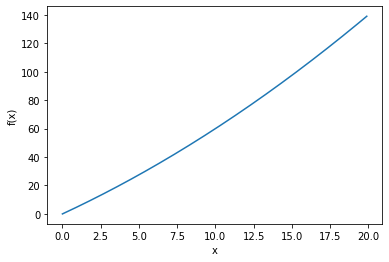

In [ ]:
# 수치미분 : 아주 작은 차분으로 미분하는 것
import numpy as np
import matplotlib.pylab as plt

def numericaldif(f, x):          # 이름은 수치 미분에서 따옴  반올림 오차(작은 값이 생략되어 최종 계산 결과에 오차가 생기게 하는 것)를 일으킨다.
    h = 10e-50                    # 매우 작은 값
    return (f(x + h) - f(x)) / h #1e-50을 float32(32비트 부동소수점)으로 나타내면 0.0이 되어 문제가 생긴다.

print(np.float32(1e-50))

def ndif(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

def f1(x):
    return 0.1*x**2+5*x

print(ndif(f1, 5))

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 생성
y = f1(x)
plt.xlabel("x") # x축의 이름 설정
plt. ylabel("f(x)") # y축의 이름 설정
plt.plot(x, y)
plt.show()

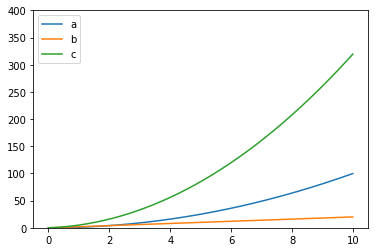

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def f1(x):
    return x ** 2


def f2(x):
    return x ** 3 + x ** 2


def numerical_differentiation(f, x):  # 수치미분
    delta_x = 1e-7  # 0.0000001
    return (f(x + delta_x) - f(x - delta_x)) / (delta_x * 2) # 중앙 차분: 수치 모델에서 사용되는 차분기법 가운데 한 가지로 가장 널리 사용되는 차분법. U(n+1)-u(n-1)=28t*f(n)의 형식으로, 
                                                             # 장점은 정밀도가 좋고, 오차는 O(△t)이지만, 계산의 가장 처음 단계에서는 사용할 수 없고, 오랜 시간 사용하면 계산 불안정을 야기시킴.

x = np.arange(0, 10, 0.01)
plt.plot(x, f1(x), label="a")
plt.plot(x, numerical_differentiation(f1, x),label="b")
plt.plot(x, numerical_differentiation(f2, x),label="c")
plt.ylim(0, 400)
plt.legend()
plt.show()

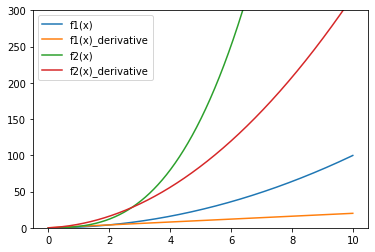

In [ ]:
import numpy as np
import matplotlib.pylab as plt
 
def numerical_differentiation(f, x):    # 수치미분
    delta_x = 1e-7    # 0.0000001
    # return (f(x+delta_x) - f(x)) / delta_x            # 전진 차분
    return (f(x+delta_x) - f(x-delta_x)) / (delta_x*2)  # 중앙 차분
    # return (f(x) - f(x-delta_x)) / delta_x            # 후진 차분
 
 
def f1(x):
    return x**2
 
def f2(x):
    return x**3 + x**2
 
x = np.arange(0,10,0.01)
 
plt.plot(x, f1(x), label="f1(x)")
plt.plot(x, numerical_differentiation(f1,x), label="f1(x)_derivative")
 
plt.plot(x, f2(x), label="f2(x)")
plt.plot(x, numerical_differentiation(f2,x), label="f2(x)_derivative")
 
plt.ylim(0, 300)
plt.legend()
plt.show()

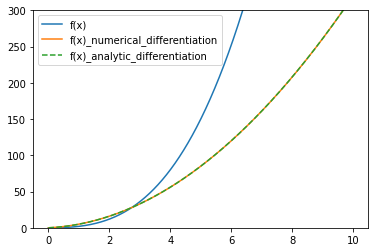

In [ ]:
import numpy as np
import matplotlib.pylab as plt
 
def numerical_differentiation(f, x):    # 수치미분
    delta_x = 1e-7    # 0.0000001
    # return (f(x+delta_x) - f(x)) / delta_x            # 전진 차분
    return (f(x+delta_x) - f(x-delta_x)) / (delta_x*2)  # 중앙 차분
    # return (f(x) - f(x-delta_x)) / delta_x            # 후진 차분
 
 
def f(x):
    return x**3 + x**2
 
def f_analytic(x):
    return 3*(x**2) + 2*x
 
x = np.arange(0,10,0.01)
 
plt.plot(x, f(x), label="f(x)")
plt.plot(x, numerical_differentiation(f,x), label="f(x)_numerical_differentiation")
plt.plot(x, f_analytic(x), linestyle='--', label="f(x)_analytic_differentiation")
 
plt.ylim(0, 300)
plt.legend()
plt.show()

X : [[-5.   -4.75 -4.5  ...  4.5   4.75  5.  ]
 [-5.   -5.   -5.   ...  5.    5.    5.  ]]
gradient : [[ 10.00000003   9.50000002   9.00000003 ...  -9.00000003  -9.50000002
  -10.00000003]
 [-10.00000003 -10.00000003 -10.00000003 ...  10.00000003  10.00000003
   10.00000003]]


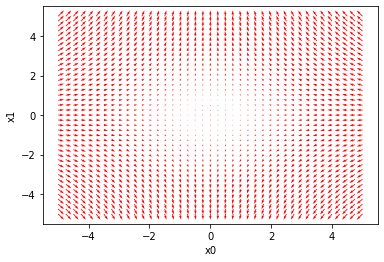

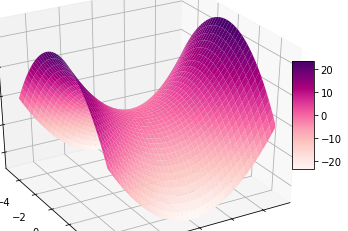

In [ ]:
import copy
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
 
def numerical_gradient(f, x):
    delta_x = 1e-7    # 0.0000001
    gradient = np.zeros_like(x)    # Return an array of zeros with the same shape
 
    for i in range(x.size):
 
        _x1 = copy.deepcopy(x)    # constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original
        _x1[i] = x[i] + delta_x
        _y1 = f(_x1)    # f(x + delta_x) 계산
 
        _x2 = copy.deepcopy(x)
        _x2[i] = x[i] - delta_x
        _y2 = f(_x2)    # f(x - delta_x) 계산
 
        gradient[i] = (_y1 - _y2) / (delta_x*2)
 
        # # 동일한 결과가 나오는 코드()추가 공간 생성 절약 가능)
        # temp_value = x[i]    # 복사
        #
        # x[i] = temp_value + delta_x
        # _y1 = f(x)
        #
        # x[i] = temp_value - delta_x
        # _y2 = f(x)
        #
        # gradient[i] = (_y1 - _y2) / (delta_x*2)
        #
        # x[i] = temp_value    # 복사된 값으로 복원
 
    return gradient
 
 
def numerical_gradient_batch(f, X):
    print("X : " + str(X))
    gradient = np.zeros_like(X)
 
    x = np.array([0.0,0.0])
 
    for i in range(X[0].size):
        for s in range(X.shape[0]):
            x[s] = X[s][i]
        # x[0] = X[0][i] <-- 1차원으로 flatten된 데이터를 하나씩 x[0]에 입력
        # x[1] = X[1][i] <-- 1차원으로 flatten된 데이터를 하나씩 x[1]에 입력
 
        _gradient = numerical_gradient(f, x)
 
        for s in range(X.shape[0]):
            gradient[s][i] = -_gradient[s]
        # gradient[0][i] = -_gradient[0] <-- 구해진 기울기 _gradient[0]를 부호를 바꿔 gradient 저장
        # gradient[1][i] = -_gradient[1] <-- 구해진 기울기 _gradient[0]를 부호를 바꿔 gradient 저장
        # 부호를 바꾸는 이유는 작아지는 방향을 알기 위해서이다.
 
    print("gradient : " + str(gradient))
    return gradient
 
 
def f(x):
    return  x[0]**2 - x[1]**2
 
x0 = np.arange(-5.0, 5.01, 0.25)
x1 = np.arange(-5.0, 5.01, 0.25)
X, Y = np.meshgrid(x0, x1)    # Make 2D coordinate arrays for vectorized evaluations
 
Xf = X.flatten()    # Return a copy of the array collapsed into 1D
Yf = Y.flatten()    # Return a copy of the array collapsed into 1D
# x0값이 [2,3]이고 x1값이 [5,6]라고 가정하면
# X값은  [[2,3],[2,3]]
# Y값은  [[5,5],[6,6]]
# Xf값은 [2,3,2,3]
# Yf값은 [5,5,6,6]
 
# 수치 편미분 Quiver 그리기
numerical_gradient = numerical_gradient_batch(f, np.array([Xf, Yf]) )
plt.quiver(Xf, Yf, numerical_gradient[0], numerical_gradient[1], color="r", headwidth=3)    # quiver(화살모음) 그리기
plt.xlabel('x0')
plt.ylabel('x1')
plt.draw()
 
# 미분전 본래 함수 3차원 그래프 그리기
Z = X**2 - Y**2
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
surf1 = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1,
                                  cmap=cm.RdPu, antialiased=True)
fig1.colorbar(surf1, shrink=0.5, aspect=5)
ax1.view_init(elev=30, azim=60)
ax1.dist = 7
plt.draw()
 
plt.show()
